In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('ECOMM DATA.xlsx')
print(df.head())
print(df.info())

   Row ID         Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891 2012-07-31 2012-07-31      Same Day    RH-19495   
1   26341    IN-2013-77878 2013-02-05 2013-02-07  Second Class    JR-16210   
2   25330    IN-2013-71249 2013-10-17 2013-10-18   First Class    CR-12730   
3   13524  ES-2013-1579342 2013-01-28 2013-01-30   First Class    KM-16375   
4   47221     SG-2013-4320 2013-11-05 2013-11-06      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology  Accessories

# 1. Total Sales

In [67]:
# Assuming there's a 'Sale_Amount' column in your dataset
total_sales = df['Sales'].sum()
print(f"Total Sales: {total_sales:,.2f}")

Total Sales: 12,642,501.91


# 2. Sales trends over time

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8212\3398660212.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Sales'].resample('M').sum()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_8212\3398660212.py:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = df['Sales'].resample('Q').sum()


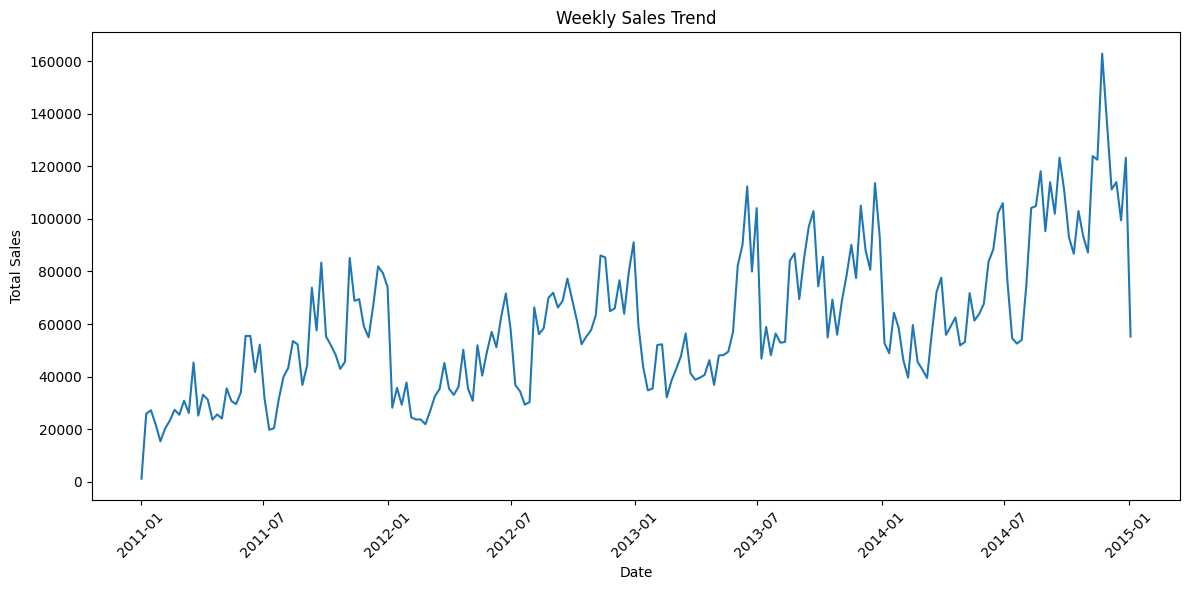

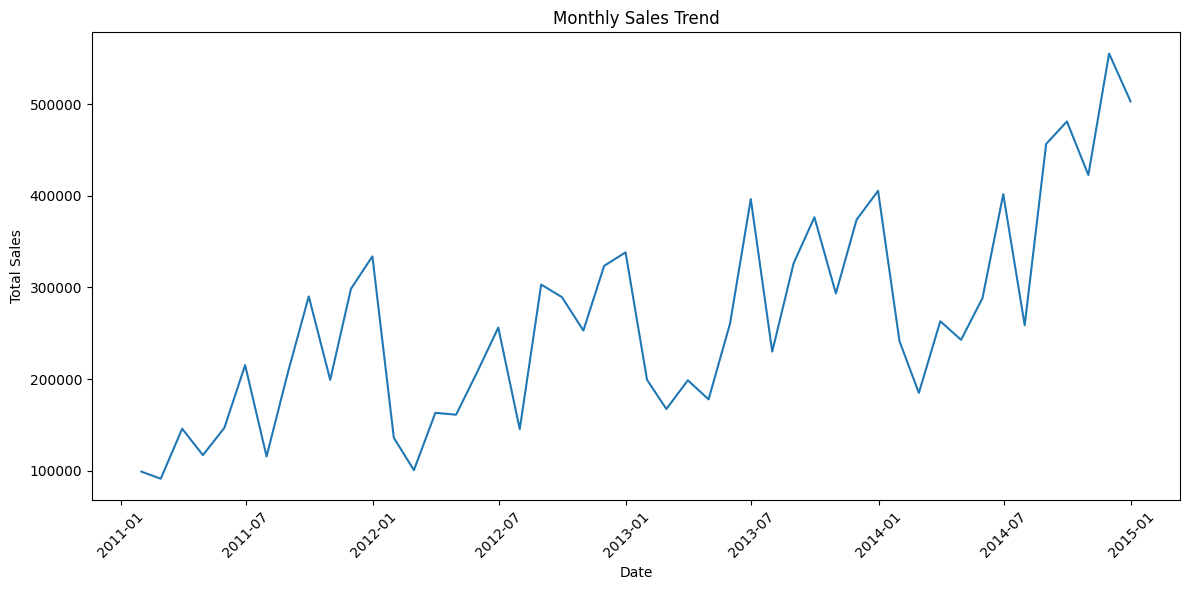

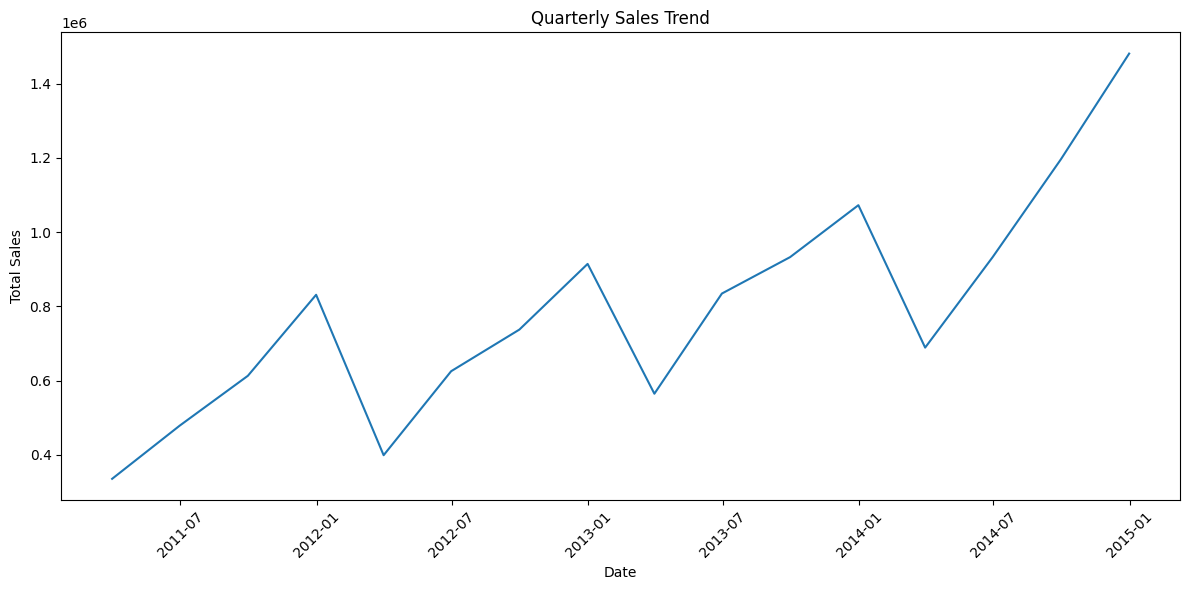

In [68]:
df['Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Date', inplace=True)

weekly_sales = df['Sales'].resample('W').sum()
monthly_sales = df['Sales'].resample('M').sum()
quarterly_sales = df['Sales'].resample('Q').sum()

# Function to plot sales trend
def plot_sales_trend(sales_data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(sales_data.index, sales_data.values)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot different time period trends
plot_sales_trend(weekly_sales, 'Weekly Sales Trend')
plot_sales_trend(monthly_sales, 'Monthly Sales Trend')
plot_sales_trend(quarterly_sales, 'Quarterly Sales Trend')

# 3. Best Selling Products

Top 10 Best-Selling Products:
Sub-Category
Phones         1.706824e+06
Copiers        1.509436e+06
Chairs         1.501682e+06
Bookcases      1.466572e+06
Storage        1.127086e+06
Appliances     1.011064e+06
Machines       7.790601e+05
Tables         7.570419e+05
Accessories    7.492370e+05
Binders        4.619115e+05
Name: Sales, dtype: float64


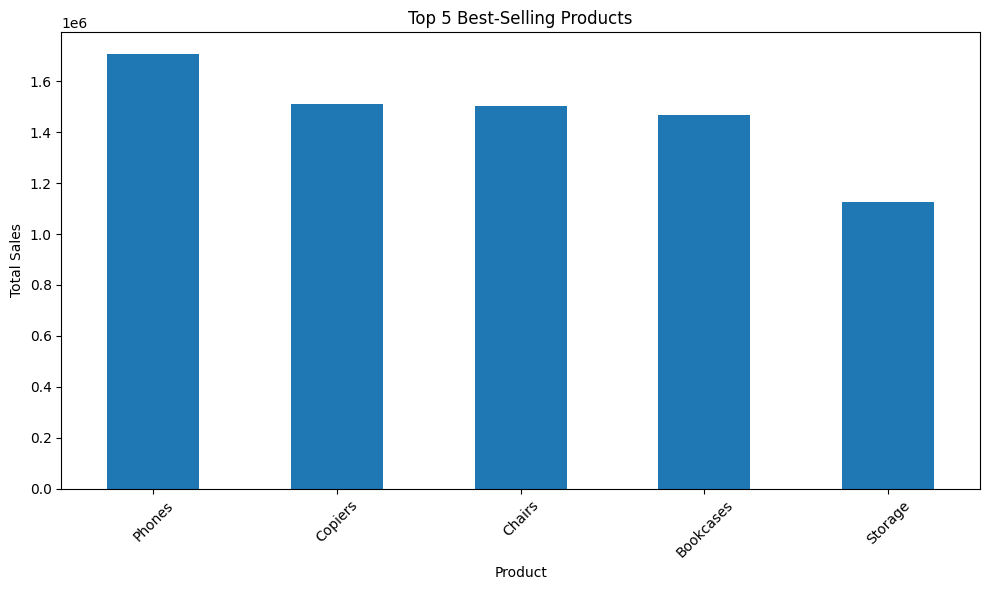

In [69]:
# Assuming there's a 'Product' column in your dataset
best_selling = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

print("Top 10 Best-Selling Products:")
print(best_selling.head(10))

# Visualize top 5 best-selling products
plt.figure(figsize=(10, 6))
best_selling.head(5).plot(kind='bar')
plt.title('Top 5 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Sales by Category

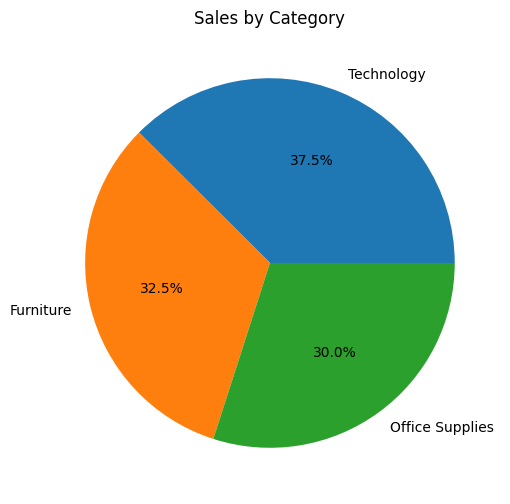

In [70]:
# Sales by category (assuming there's a 'Category' column)
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
category_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales by Category')
plt.ylabel('')
plt.show()